In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

# 2.1.a

In [2]:
X= pd.read_csv('/home/neaf/code/ML_course/H1/dataset/data_X.csv')

In [3]:
# GRE score, TOFEL score, University rating, SOP, LOR, CGPA, Research as the input
input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']
print(X.shape)
X[input][0:10]

(500, 8)


,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [4]:
Y= pd.read_csv('/home/neaf/code/ML_course/H1/dataset/data_T.csv')

In [5]:
ans = ['Chance_of_Admit ']
print(Y.shape)
Y[ans][0:10]

(500, 2)


,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


In [6]:
X_scale = preprocessing.scale(X[input])

## Cutting 30 inorder to build test data

In [7]:
# Cutting data to train and 
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y[ans], random_state=42, test_size=0.33)

## M=2 result

In [8]:
poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train) 

reg = LinearRegression(normalize=True) 
rig = Ridge(normalize=True)
reg.fit(X_train_poly, y_train) 
rig.fit(X_train_poly, y_train)

Ridge(normalize=True)

In [9]:
print('regression score:', reg.score(X_train_poly, y_train))
print('+ L2 regular score:', rig.score(X_train_poly, y_train))

regression score: 0.8358024104377333
+ L2 regular score: 0.781677078193615


In [10]:
X_test_poly = poly.fit_transform(X_test)
y_pred = reg.predict(X_test_poly)
y_pred2 = rig.predict(X_test_poly)



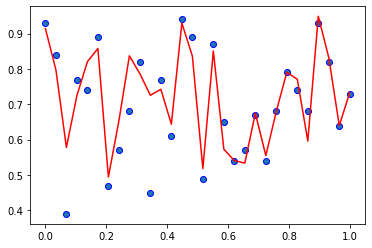

In [11]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

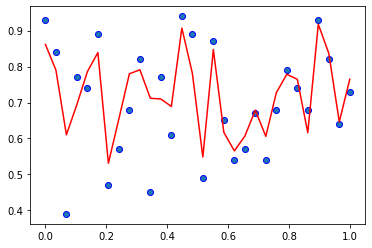

In [12]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred2[0:30], c="r", label="fitting")

In [13]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
MSE_result2 = metrics.mean_squared_error(y_test, y_pred2)
print('REG Mean Squared Error:', MSE_result, '\t', 'RIG Mean Squared Error:', MSE_result2 )

ACC_result = metrics.r2_score(y_test, y_pred)
ACC_reuslt2 = metrics.r2_score(y_test, y_pred2)
print('REG r2_score:', ACC_result, '\t', 'RIG r2_score:', ACC_reuslt2 )

REG Mean Squared Error: 0.003633051273465063 	 RIG Mean Squared Error: 0.004160345068694907
REG r2_score: 0.8236674021387318 	 RIG r2_score: 0.7980748415745297


Using Scale
EG Mean Squared Error: 0.003635596834452343 	 RIG Mean Squared Error: 0.003619664827021821
REG r2_score: 0.8235438516165633 	 RIG r2_score: 0.8243171223600532

Using StandScale
REG Mean Squared Error: 0.004240479699337121 	 RIG Mean Squared Error: 0.0037458755596616305
REG r2_score: 0.7941854531414515 	 RIG r2_score: 0.8181913991898635

## M=1 result

In [14]:
poly = PolynomialFeatures(degree = 1) 
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train) 

reg = LinearRegression() 
rig = Ridge()

In [15]:
print(X_train.shape, X_test.shape)

(335, 7) (165, 7)


In [16]:
X_test_ploy = poly.fit_transform(X_test)

reg.fit(X_train_poly, y_train)
rig.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_ploy)
y_pred2 = rig.predict(X_test_ploy)

X_test_poly = poly.fit_transform(X_test)
y_pred = lin1.predict(X_test_poly)

print(y_pred[0:10])

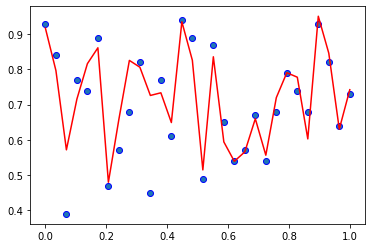

In [17]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

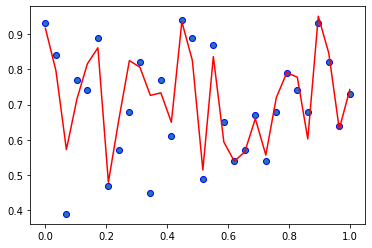

In [18]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred2[0:30], c="r", label="fitting")

In [19]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
MSE_result2 = metrics.mean_squared_error(y_test, y_pred2)
print('REG Mean Squared Error:', MSE_result, '\n', ' RIG Mean Squared Error:', MSE_result2) 

REG Mean Squared Error: 0.0036214300812172574 
  RIG Mean Squared Error: 0.0036186207170188374


## Discussion

## Steps
In this part, first I found data range is big like GRE_score and University_rating so scaling data.

Second, I divide data into train(70%) and test(30%).

Third, using basic linear model and L2 regulartion to fit train data before predit test data.

Final, using MSE and R2 socre to anaylize model.

## Result
Look like polynomials regression of order M=1 is better than M=2 but the error is very small between M1 M2.

# 2.1.b

In [20]:
X[input][1:5]

,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


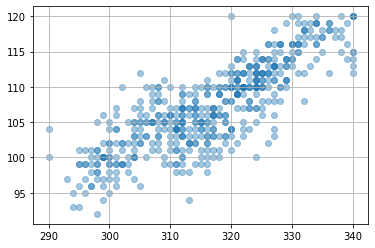

In [21]:
plt.scatter(X['GRE_score'],X['TOFEL_score'],  
            alpha = 0.4, cmap = 'Reds')
plt.grid()

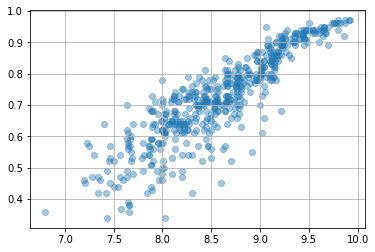

In [22]:
plt.scatter(X['CGPA'],Y['Chance_of_Admit '],  
            alpha = 0.4, cmap = 'Reds')
plt.grid()

(array([ 8., 16., 24., 47., 63., 78., 93., 62., 48., 61.]),
 array([0.34 , 0.403, 0.466, 0.529, 0.592, 0.655, 0.718, 0.781, 0.844,
        0.907, 0.97 ]),
 <a list of 10 Patch objects>)

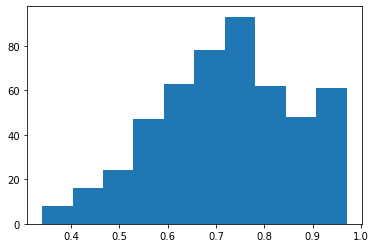

In [23]:
plt.hist(Y['Chance_of_Admit '])

In [24]:
from scipy.stats import pearsonr
#input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']
pearson_res = {}
for i in input:
    #print(pearsonr(X[i], Y['Chance_of_Admit '])[1])
    pearson_res[i] = pearsonr(X[i], Y['Chance_of_Admit '])[1]
sorted(pearson_res.values())
pearson_res

{'GRE_score': 1.0884036862476284e-117,
 'TOFEL_score': 6.729926762328514e-109,
 'University_rating': 5.866255627650183e-72,
 'SOP': 2.8859074534541132e-70,
 'LOR ': 3.069932320299405e-60,
 'CGPA': 3.396544858710999e-165,
 'Research': 3.595493545839702e-40}

In [25]:
from sklearn.decomposition import PCA
comb1_pca = ['SOP', 'LOR ']
comb2_pca = ['GRE_score', 'TOFEL_score']

In [26]:
new_input = ['S_L_pca', 'G_T_pca', 'University_rating', 'CGPA', 'Research']
#input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']

pca = PCA(n_components=1)
comb1 = pca.fit_transform(X[comb1_pca])
comb2 = pca.fit_transform(X[comb2_pca])

df = pd.DataFrame(data=comb1, columns=['S_L_pca'])
df2 = pd.DataFrame(data=comb2, columns=['G_T_pca'])
new_X = X
new_X['S_L_pca']  = df
new_X['G_T_pca'] = df2
new_X[:10]

,Serial_id,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,S_L_pca,G_T_pca
0,1,337,118,4,4.5,4.5,9.65,1,-1.516619,-23.184597
1,2,324,107,4,4.0,4.5,8.87,1,-1.145362,-6.698803
2,3,316,104,3,3.0,3.5,8.00,1,0.266983,1.810513
3,4,322,110,3,3.5,2.5,8.67,1,0.565558,-6.198916
4,5,314,103,2,2.0,3.0,8.21,0,1.344411,4.046338
5,6,330,115,5,4.5,3.0,9.34,1,-0.511871,-15.576201
6,7,321,109,3,3.0,4.0,8.20,1,-0.067933,-4.864011
7,8,308,101,2,3.0,4.0,7.90,0,-0.067933,10.319829
8,9,302,102,1,2.0,1.5,8.00,0,2.349159,15.291366
9,10,323,108,3,3.5,3.0,8.60,0,0.230642,-6.231867


In [27]:
new_X_scale = preprocessing.scale(new_X[new_input])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_X_scale, Y[ans], random_state=42, test_size=0.33)

poly = PolynomialFeatures(degree = 1) 
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train) 

reg = LinearRegression() 
rig = Ridge()

In [29]:
X_test_ploy = poly.fit_transform(X_test)

reg.fit(X_train_poly, y_train)
rig.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_ploy)
y_pred2 = rig.predict(X_test_ploy)

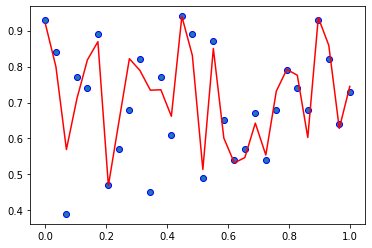

In [30]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

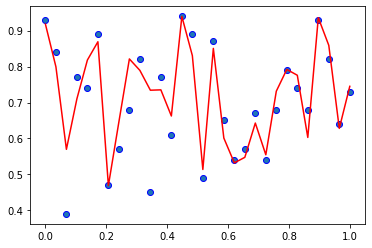

In [31]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred2[0:30], c="r", label="fitting")

In [32]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
MSE_result2 = metrics.mean_squared_error(y_test, y_pred2)
print('REG Mean Squared Error:', MSE_result, '\n', ' RIG Mean Squared Error:', MSE_result2) 

REG Mean Squared Error: 0.003672709647355216 
  RIG Mean Squared Error: 0.003668684940350256


## 2.1.b result
## Analyze feature
So I try analyze feature and I found ```CGPA most``` influential answer.

I use pearsonr to compare every columns, this is result (top is less influential down is most influential)
```{'GRE_score': 1.0884036862476284e-117,
 'TOFEL_score': 6.729926762328514e-109,
 'University_rating': 5.866255627650183e-72,
 'SOP': 2.8859074534541132e-70,
 'LOR ': 3.069932320299405e-60,
 'CGPA': 3.396544858710999e-165,
 'Research': 3.595493545839702e-40}
 ```
 
## PCA
SOP and LOR can do pca 
GRE_score, TOFEL_score can do pca.

So we have new column S_L_pca, G_T_pca,

## Result
Linear Regression MSE result is 0.0036727, Linear Regression + L2 regression MSE result is 0.003668.

The REG MSE is higer but RIG MSE is less.

# 2.2.a

In [47]:
from Gaussian import GaussianFeature
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import make_pipeline
import numpy as np
X[input].shape
Y[ans].shape

(500, 1)

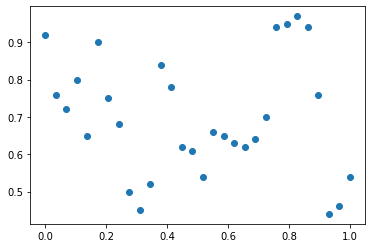

In [58]:
list_x = np.linspace(0, 1, 30)
#y = 3 * x - 5 + rng.randn(30)
plt.scatter(list_x, Y['Chance_of_Admit '][:30]);

In [63]:
reg = GaussianProcessRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_test)


ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

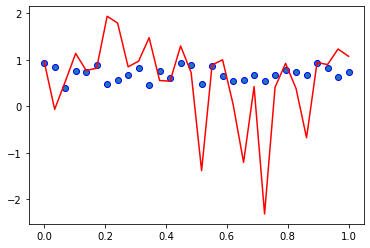

In [60]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

In [61]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
print('REG Mean Squared Error:', MSE_result, '\n', ' RIG Mean Squared Error:', MSE_result2) 

REG Mean Squared Error: 4.042180591553886 
  RIG Mean Squared Error: 0.003668684940350256
